# *ALL STATE CUMMULATIVE JOB PREDICTION*

In [23]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('GKD_JOBS_ALL_ENGG.csv')

#print the head
df.head()

,CollegeState,Specialization,GraduationYear,Salary
0,Delhi,instrumentation and control engineering,2013,445000
1,Delhi,computer science & engineering,2013,420000
2,Delhi,computer science & engineering,2013,200000
3,Delhi,computer science & engineering,2013,375000
4,Delhi,computer science & engineering,2013,350000


<AxesSubplot:xlabel='GraduationYear', ylabel='Salary'>

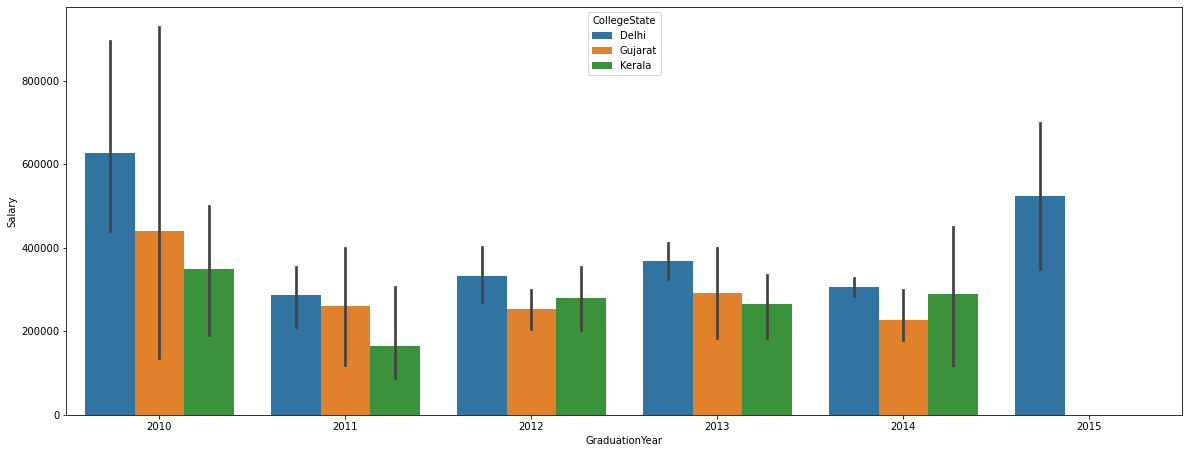

In [24]:
data=df
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.barplot(x=data['GraduationYear'], y=data['Salary'], hue='CollegeState', data=data)
# plt.title('Scientific and technical journal articles')
# plt.ylabel('Scientific and technical journal articles')
# plt.xlabel('Year')

<AxesSubplot:xlabel='GraduationYear', ylabel='Salary'>

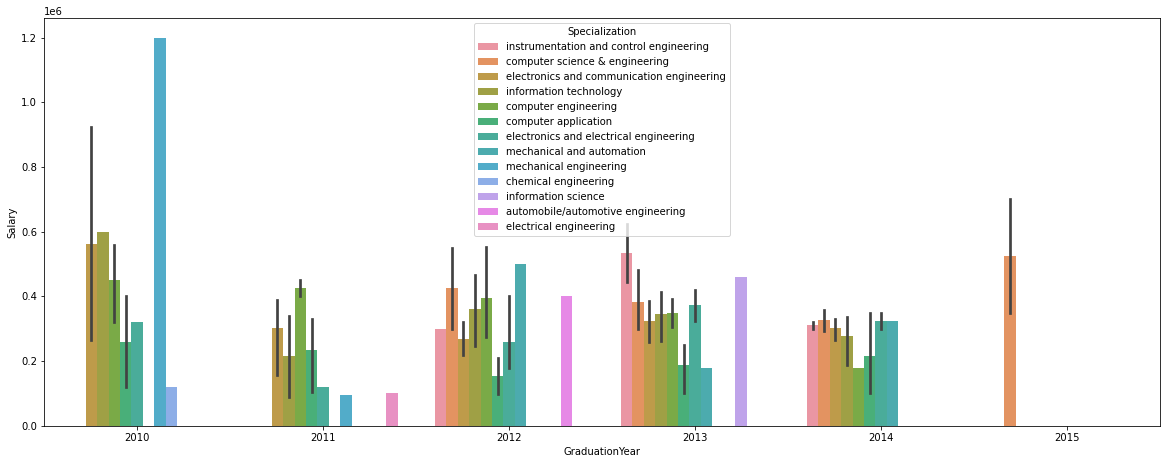

In [25]:
plt.figure(figsize=[20, 7.5]) # Set dimensions for figure
sns.barplot(x=data['GraduationYear'], y=data['Salary'], hue='Specialization', data=data)

In [26]:
df.shape

(163, 4)

In [27]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['GraduationYear', 'Salary'])
for i in range(0,len(data)):
    new_data['GraduationYear'][i] = data['GraduationYear'][i]
    new_data['Salary'][i] = data['Salary'][i]

#setting index
new_data.index = new_data.GraduationYear
new_data.drop('GraduationYear', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

# train = dataset[4:7,:]
# valid = dataset[7:8,:]

train = dataset[100:]
test = dataset[100:]
# split into input and outputs
x_train, y_train = train[:,:-1], train[:,:-1]
test_X, test_y = test[:,:-1], test[:,:-1]

# #converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(1,len(train)):
    x_train.append(scaled_data[i-1:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(62, 1, 1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU
model_gru = Sequential()
model_gru.add(LSTM(128, return_sequences=True,input_shape=(x_train.shape[1], x_train.shape[2])))
model_gru.add(LSTM(units=64, return_sequences=True))
model_gru.add(LSTM(units=16, return_sequences=True))
model_gru.add(LSTM(units=4, return_sequences=False))
model_gru.add(Dense(units=1))

model_gru.compile(loss='mse', optimizer='adam')
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)             49408     
                                                                 
 lstm_6 (LSTM)               (None, 1, 16)             5184      
                                                                 
 lstm_7 (LSTM)               (None, 4)                 336       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 121,493
Trainable params: 121,493
Non-trainable params: 0
_________________________________________________________________


In [29]:
gru_history = model_gru.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
2/2 [==============================] - 5s 22ms/step - loss: 0.1039
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 0.1019
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0999
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 0.0979
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0959
Epoch 6/100
2/2 [==============================] - 0s 17ms/step - loss: 0.0937
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0917
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.0894
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 0.0872
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0849
Epoch 11/100
2/2 [==============================] - 0s 16ms/step - loss: 0.0824
Epoch 12/100
2/2 [==============================] - 0s 9ms/step - loss: 0.0798
Epoch 13/100
2/2 [==============================] - 

In [30]:
# predicting values, using past 10 from the train data
inputs = new_data[len(new_data) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

test_x = []
for i in range(1,inputs.shape[0]):
    test_x.append(inputs[i-1:i,0])
test_x = np.array(test_x)
test_x.shape
test_x = np.reshape(test_x, (test_x.shape[0],test_x.shape[1], 1))
test_x.shape

(72, 1, 1)

In [31]:
predicted = model_gru.predict(test_x)
predicted = scaler.inverse_transform(predicted)

3/3 [==============================] - 1s 6ms/step


Text(0.5, 1.0, 'Cumulative salary of Engineering')

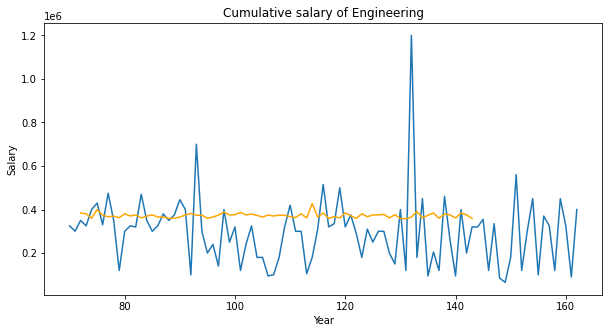

In [32]:
b=len(test_x)
c=len(predicted) + b
plt.figure(figsize=(10,5))
plt.plot(df.iloc[70:,3:4])
plt.plot(np.arange(b,c), np.array(predicted),label='Prediction', color='orange')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Cumulative salary of Engineering')

Text(0.5, 1.0, 'Prediction of Cumulative salary of Engineering')

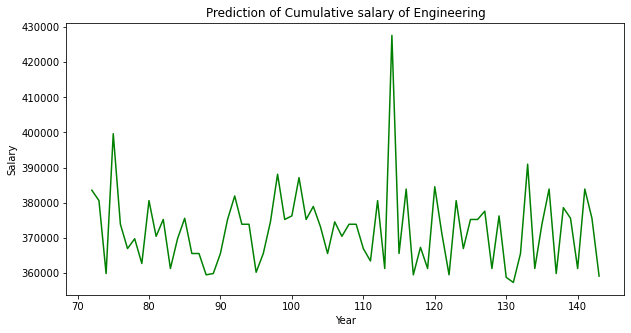

In [33]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(b,c), np.array(predicted), label='Prediction', color='green')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Prediction of Cumulative salary of Engineering')

In [34]:
courses=np.unique(df['Specialization'])
print(courses)
clg_code=[]
for i in range(len(courses)):
    clg_code.append(i+1)
# clg_code
df['Specialization']=df['Specialization'].replace(courses,clg_code)
bak_college=np.array(df['Specialization'])
df.head()

['automobile/automotive engineering' 'chemical engineering'
 'computer application' 'computer engineering'
 'computer science & engineering' 'electrical engineering'
 'electronics and communication engineering'
 'electronics and electrical engineering' 'information science'
 'information technology' 'instrumentation and control engineering'
 'mechanical and automation' 'mechanical engineering']


,CollegeState,Specialization,GraduationYear,Salary
0,Delhi,11,2013,445000
1,Delhi,5,2013,420000
2,Delhi,5,2013,200000
3,Delhi,5,2013,375000
4,Delhi,5,2013,350000


In [35]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# Using only one feature
x = df.iloc[:, 1].values
y = df.iloc[:, 3].values

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=0)

In [36]:
x

array([11,  5,  5,  5,  5,  7,  7, 10,  7, 10,  5, 10,  4,  3,  7,  7, 10,
        7,  7, 10,  3, 10,  5, 10, 10,  5,  7,  7,  7,  4,  7,  5,  5,  7,
        4,  4,  4,  4,  3,  5,  4, 10,  7,  5, 10,  8,  7,  7,  7,  5,  5,
        5,  4,  4,  4,  3, 12,  5,  7,  5,  4,  3,  3,  5,  5,  5,  8,  7,
       10, 11,  7,  7,  7,  7,  8,  4,  3,  4,  7,  8,  8,  7, 11, 10, 10,
        5,  5,  4,  5,  7,  7,  5,  3,  5, 10,  8,  7,  7,  7,  3,  8,  7,
        3,  8,  8,  7,  3,  3, 12, 10,  8, 11,  5,  3, 10,  5,  5,  7,  7,
       12,  7, 10,  7, 10,  7, 10,  7, 11,  5,  7,  4,  8, 13,  4, 10, 10,
        7,  2,  9,  7, 13,  1,  7,  4,  7,  7,  7,  7,  7,  7,  4,  4,  3,
        5,  4,  6,  7,  7,  7,  5,  5, 10,  3], dtype=int64)

In [37]:
y

array([ 445000,  420000,  200000,  375000,  350000,  340000,  325000,
        450000,  330000,  600000,  350000,  410000,  150000,  210000,
        500000,  325000,  380000,  325000,  330000,  325000,  100000,
        500000,  550000,  100000,  340000,  350000,  340000, 1200000,
        250000,  400000,  360000,  325000,  240000,  400000,  880000,
        325000,  420000,  360000,  350000,  275000,  200000,  450000,
        350000,  325000,  350000,  325000,  730000,  310000,  350000,
        350000,  325000,  420000,  400000,  265000,  520000,  180000,
        325000,  240000,  705000,  925000,  400000,  200000,  270000,
        350000,  590000,  145000,  350000,  340000,  350000,  625000,
        325000,  300000,  350000,  325000,  400000,  430000,  330000,
        475000,  350000,  120000,  300000,  325000,  320000,  470000,
        350000,  300000,  325000,  380000,  350000,  375000,  445000,
        400000,  100000,  700000,  300000,  200000,  240000,  140000,
        400000,  250

In [38]:
print('Shape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

x_train= x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

print('\nShape of X_train:: ', x_train.shape)
print('Shape of y_train:: ', y_train.shape)
print('Shape of X_test:: ', x_test.shape)
print('Shape of y_test:: ', y_test.shape)

Shape of X_train::  (130,)
Shape of y_train::  (130,)
Shape of X_test::  (33,)
Shape of y_test::  (33,)

Shape of X_train::  (130, 1)
Shape of y_train::  (130,)
Shape of X_test::  (33, 1)
Shape of y_test::  (33,)


In [39]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [40]:
dict = { }
for key in courses:
    for value in clg_code:
        dict[key] = value
        clg_code.remove(value)
        break

In [41]:
print(dict)

{'automobile/automotive engineering': 1, 'chemical engineering': 2, 'computer application': 3, 'computer engineering': 4, 'computer science & engineering': 5, 'electrical engineering': 6, 'electronics and communication engineering': 7, 'electronics and electrical engineering': 8, 'information science': 9, 'information technology': 10, 'instrumentation and control engineering': 11, 'mechanical and automation': 12, 'mechanical engineering': 13}


In [43]:
col=df.columns.tolist()[1:2]
x = []
for i in col:
    print("==================================================")
    val = input("Enter the name of the course: \n")
    if val in dict:
        x.append(dict.get(val))

userpreddt=model.predict([x])
print("Expected maximum salary in",val + " can be:",int(userpreddt))


Enter the name of the course: 
mechanical and automation
Expected maximum salary in mechanical and automation can be: 383448
